In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# this is unnesscery code

In [ ]:
# Install required libraries
!pip install datasets --quiet
!pip install matplotlib seaborn wordcloud --quiet

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

from datasets import load_dataset as Cus_tkt_load_dataset
import pandas as Cus_tkt_pd
import numpy as Cus_tkt_np
import matplotlib.pyplot as Cus_tkt_plt
import seaborn as Cus_tkt_sns
from wordcloud import WordCloud as Cus_tkt_WordCloud
import re as Cus_tkt_re
import string as Cus_tkt_string

from nltk.corpus import stopwords as Cus_tkt_stopwords_corpus
from nltk.tokenize import word_tokenize as Cus_tkt_word_tokenize
from nltk.stem import WordNetLemmatizer as Cus_tkt_WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# TEXT CLEANING FUNCTION

Cus_tkt_stopwords = set(Cus_tkt_stopwords_corpus.words("english"))
Cus_tkt_lemmatizer = Cus_tkt_WordNetLemmatizer()

def Cus_tkt_clean_text(Cus_tkt_text):
    if Cus_tkt_pd.isna(Cus_tkt_text):
        return ""

    Cus_tkt_text = Cus_tkt_text.lower()
    Cus_tkt_text = Cus_tkt_re.sub(r"http\S+|www\S+|https\S+", "", Cus_tkt_text)
    Cus_tkt_text = Cus_tkt_re.sub(r"\S+@\S+", "", Cus_tkt_text)
    Cus_tkt_text = Cus_tkt_re.sub(r"\d+", "", Cus_tkt_text)
    Cus_tkt_text = Cus_tkt_text.translate(str.maketrans("", "", Cus_tkt_string.punctuation))

    Cus_tkt_tokens = Cus_tkt_word_tokenize(Cus_tkt_text)

    Cus_tkt_tokens = [
        Cus_tkt_lemmatizer.lemmatize(word)
        for word in Cus_tkt_tokens
        if word not in Cus_tkt_stopwords
    ]

    return " ".join(Cus_tkt_tokens)


In [ ]:
#  LOAD DATASET FROM HUGGINGFACE

Cus_tkt_rawdata = Cus_tkt_load_dataset("Tobi-Bueck/customer-support-tickets")
Cus_tkt_df = Cus_tkt_rawdata["train"].to_pandas()

print("Dataset Loaded:")
Cus_tkt_df.head()

Dataset Loaded:


,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51.0,Security,Outage,Disruption,Data Breach,None,None,None,None
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51.0,Account,Disruption,Outage,IT,Tech Support,None,None,None
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51.0,Product,Feature,Tech Support,None,None,None,None,None
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51.0,Billing,Payment,Account,Documentation,Feedback,None,None,None
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51.0,Product,Feature,Feedback,Tech Support,None,None,None,None


In [ ]:
# HANDLE NULL AND DUPLICATE VALUES

print("Before Cleaning:", Cus_tkt_df.shape)

Cus_tkt_df["subject"] = Cus_tkt_df["subject"].fillna("")
Cus_tkt_df["body"] = Cus_tkt_df["body"].fillna("")

Cus_tkt_df = Cus_tkt_df.drop_duplicates()

print("After Cleaning:", Cus_tkt_df.shape)

Before Cleaning: (61765, 16)
After Cleaning: (61765, 16)


In [ ]:
# APPLY TEXT CLEANING

nltk.download("punkt_tab")

Cus_tkt_df["Cus_tkt_clean_subject"] = Cus_tkt_df["subject"].apply(Cus_tkt_clean_text)
Cus_tkt_df["Cus_tkt_clean_body"] = Cus_tkt_df["body"].apply(Cus_tkt_clean_text)

# merged text
Cus_tkt_df["Cus_tkt_merged_text"] = (
    Cus_tkt_df["Cus_tkt_clean_subject"] + " " + Cus_tkt_df["Cus_tkt_clean_body"]
)

# final target column
Cus_tkt_df["Cus_tkt_target"] = Cus_tkt_df["type"]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


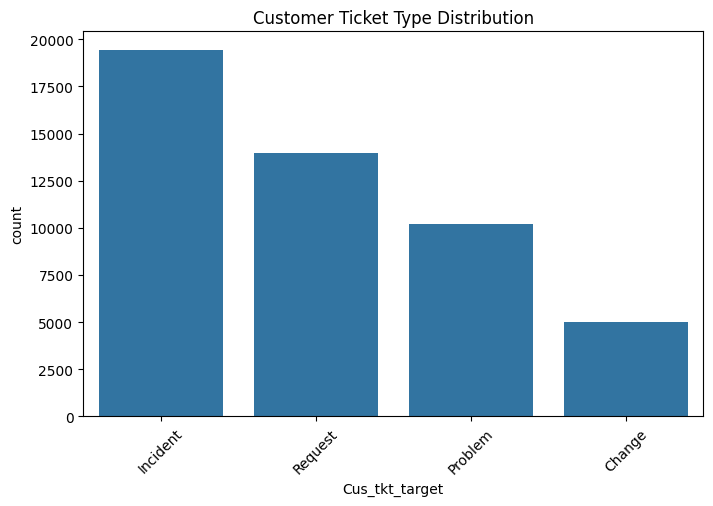

In [ ]:
# ---- Target Distribution ----
Cus_tkt_plt.figure(figsize=(8,5))
Cus_tkt_sns.countplot(x=Cus_tkt_df["Cus_tkt_target"])
Cus_tkt_plt.title("Customer Ticket Type Distribution")
Cus_tkt_plt.xticks(rotation=45)
Cus_tkt_plt.show()

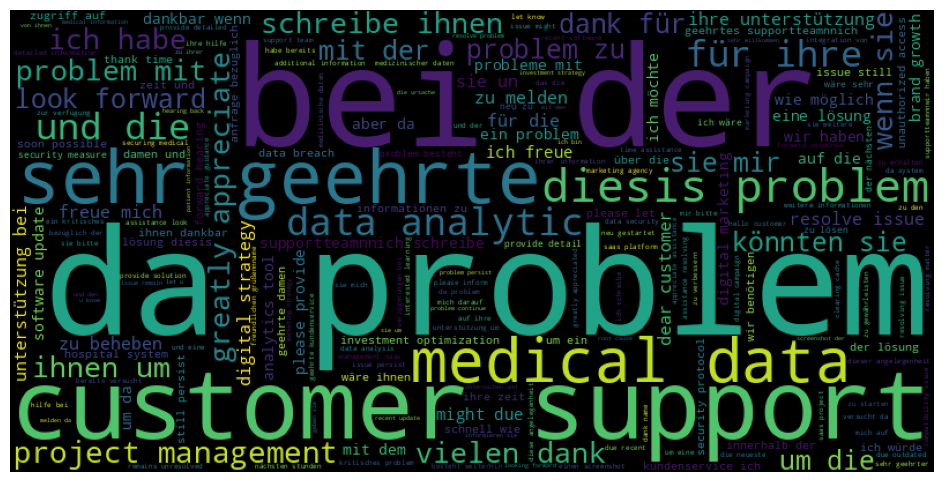

In [ ]:
# ---- Word Cloud ----
Cus_tkt_text_for_wc = " ".join(Cus_tkt_df["Cus_tkt_merged_text"])

Cus_tkt_plt.figure(figsize=(12,6))
Cus_tkt_wc = Cus_tkt_WordCloud(width=800, height=400).generate(Cus_tkt_text_for_wc)
Cus_tkt_plt.imshow(Cus_tkt_wc)
Cus_tkt_plt.axis("off")
Cus_tkt_plt.show()

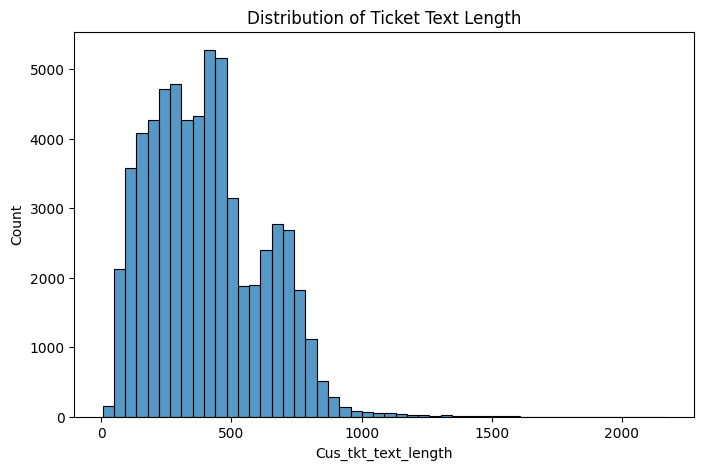

In [ ]:
# ---- Text Length Distribution ----
Cus_tkt_df["Cus_tkt_text_length"] = Cus_tkt_df["Cus_tkt_merged_text"].apply(len)

Cus_tkt_plt.figure(figsize=(8,5))
Cus_tkt_sns.histplot(Cus_tkt_df["Cus_tkt_text_length"], bins=50)
Cus_tkt_plt.title("Distribution of Ticket Text Length")
Cus_tkt_plt.show()


In [ ]:
# Saving preprocessed data

Cus_tkt_output_path = "/content/drive/My Drive/Code/Cus_tkt_preprocessed_dataset.csv"

Cus_tkt_df.to_csv(Cus_tkt_output_path, index=False, encoding="utf-8")

print("Preprocessed dataset saved successfully!")

print("\nProcessed Dataset Preview:")
display(Cus_tkt_df.head())

Preprocessed dataset saved successfully!

Processed Dataset Preview:


,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,...,tag_4,tag_5,tag_6,tag_7,tag_8,Cus_tkt_clean_subject,Cus_tkt_clean_body,Cus_tkt_merged_text,Cus_tkt_target,Cus_tkt_text_length
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51.0,Security,Outage,...,Data Breach,None,None,None,None,wesentlicher sicherheitsvorfall,sehr geehrtes supportteamnnich möchte einen gr...,wesentlicher sicherheitsvorfall sehr geehrtes ...,Incident,761
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51.0,Account,Disruption,...,IT,Tech Support,None,None,None,account disruption,dear customer support teamnni writing report s...,account disruption dear customer support teamn...,Incident,415
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51.0,Product,Feature,...,None,None,None,None,None,query smart home system integration feature,dear customer support teamnni hope message rea...,query smart home system integration feature de...,Request,458
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51.0,Billing,Payment,...,Documentation,Feedback,None,None,None,inquiry regarding invoice detail,dear customer support teamnni hope message fin...,inquiry regarding invoice detail dear customer...,Request,475
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51.0,Product,Feature,...,Tech Support,None,None,None,None,question marketing agency software compatibility,dear support teamnni hope message reach well r...,question marketing agency software compatibili...,Problem,545
